# Środowiska uruchomieniowe C3. Streamlit 2.
#### Celem tego ćwiczenia jest przedstawienie w uproszczeniu procesu trenowania kilku podstawowych modeli ML. Wykorzystamy słynny zbiór danych z Kaggle - Titanic - Machine Learning from Disaster. Więcej informacji o tych danych można znaleźć na stronie internetowej - https://www.kaggle.com/c/titanic/data 

### 1. Import bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

### 2. Przygotowanie danych do analizy

In [2]:
os.getcwd()

'C:\\Users\\s18668\\Downloads\\C3-20211107T121055Z-001\\C3'

In [3]:
base_data = pd.read_csv("dane2.csv", sep = ";");
base_data.columns
# na tym etapie tworzymy nową zmienną, którą nazywamy base_data, zawierającą nasz zbiór danych
data = base_data;
# tworzymy kopię naszych danych bez zbędnych kolumn (np. PassengerID i Name)

In [4]:
data.isnull().any()
# sprawdzamy czy mamy jakiekolwiek brakujące dane

objawy     False
wiek        True
choroby    False
wzrost      True
zdrowie    False
dtype: bool

#### Możemy wygenerować mapę ciepła symbolizującą braki danych - każdy "pomarańczowy pasek" to miejsce, w którym jest brak danych

<AxesSubplot:>

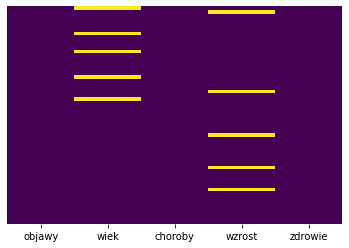

In [5]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# cbar ustalamy jako false, ponieważ nie wniesie nam to dodatkowych informacji

#### Już po tej prostej wizualizacji widzimy, że mamy dużo przypadków brakujących danych odnoszących się do wieku. Brakujące dane odnośnie wieku możemy zastąpić średnią.

In [6]:
# Transformations and additions
data["wiek"].fillna((data["wiek"].mean()), inplace=True)
data["wzrost"].fillna((data["wzrost"].mean()), inplace=True)

In [7]:
data.isnull().any()

objawy     False
wiek       False
choroby    False
wzrost     False
zdrowie    False
dtype: bool

#### Zanim przejdziemy dalej musimy jeszcze zadbać o właściwe nazewnictwo zmiennych. W naszej bazie danych mamy na razie informację w postaci Stringów - np. płeć jest oznaczona jako male lub female. Musimy to naprawić za pomocą "dumy variable". Zamienimy je automatycznie na wartości np. 1 będzie dla mężczyzn. Przczytaj o tym więcej: https://pl.wikipedia.org/wiki/Dummy_coding

In [8]:
encoder = LabelEncoder()
data.loc[:,"Sex"] = encoder.fit_transform(data.loc[:,"Sex"])
# male = 1, female = 0

encoder = LabelEncoder()
data.loc[:,"Embarked"] = encoder.fit_transform(data.loc[:,"Embarked"])

### 3. Eksploracja danych

<AxesSubplot:xlabel='Survived', ylabel='count'>

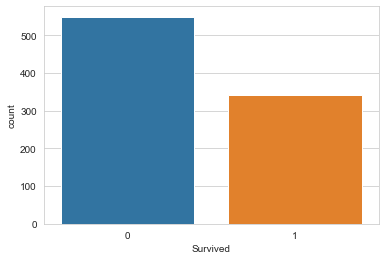

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data)
# używamy biblioteki seaborn do stworzenia prostego wykresu symbolizującego osoby, które przeżyły (1) i nie przeżyły (0)

<AxesSubplot:xlabel='Survived', ylabel='count'>

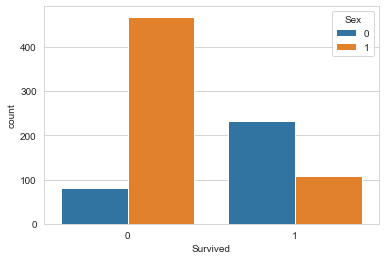

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data)
# możemy też wygenerować taki wykres, który powie nam więcej o płci osób, które nie przeżyły

In [8]:
print(data)

    objawy       wiek  choroby      wzrost  zdrowie
0        1  44.163636        0  170.000000        0
1        1  65.000000        0  183.345455        0
2        1  55.000000        0  182.000000        0
3        1  44.000000        0  187.000000        0
4        1  77.000000        0  165.000000        0
5        1  64.000000        0  164.000000        0
6        2  54.000000        1  178.000000        0
7        1  44.163636        1  190.000000        0
8        1  76.000000        1  200.000000        0
9        2  54.000000        0  198.000000        0
10       3  56.000000        0  187.000000        0
11       1  68.000000        0  167.000000        0
12       3  44.163636        1  168.000000        0
13       2  55.000000        1  189.000000        0
14       1  44.000000        1  177.000000        0
15       2  43.000000        1  166.000000        0
16       2  32.000000        1  188.000000        0
17       3  23.000000        1  198.000000        0
18       2  

### 4. Trenowanie modelu

In [9]:
y = data.iloc[:,4] # survived - zmienna, którą będziemy chcieli przewidzieć
x = data.iloc[:,0:3] # zmienne na podstawie, których chcemy przewidzieć
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
# test size odnosi się do liczby obserwacji przeznaczonej do wytrenowania modelu

In [10]:
def model(X_train, y_train):
    
    forest = RandomForestClassifier( n_estimators=10, random_state=0)
    forest.fit(X_train,y_train)
    print("Las: {0}".format(forest.score(X_train,y_train)) )
    
    lreg =LogisticRegression()
    lreg.fit(X_train,y_train)
    print("Regresja logistyczna: {0}".format(lreg.score(X_train,y_train)) )
  
    tree =DecisionTreeClassifier()
    tree.fit(X_train,y_train)
    print("Drzewa decyzyjne: {0}".format(tree.score(X_train,y_train)) )
   
    return forest, lreg, tree

forest, lreg, tree = model(X_train,y_train)

Las: 0.9791666666666666
Regresja logistyczna: 0.8958333333333334
Drzewa decyzyjne: 1.0


In [11]:
target_names=[0,1]

y1_predict = forest.predict(X_test)
print("Random Forest {0}".format(accuracy_score(y_test, y1_predict)))

y2_predict = lreg.predict(X_test)
print("Logistic Regresion {0}".format(accuracy_score(y_test, y2_predict)))

y3_predict = tree.predict(X_test)
print("Decision Tree {0}".format(accuracy_score(y_test, y3_predict)))

# uzyskujemy dzięki temu informacje dotyczącą dokładności modelu 

Random Forest 0.75
Logistic Regresion 0.8333333333333334
Decision Tree 0.8333333333333334


In [12]:
print("Ocena modelu 1. Las")
print(classification_report(y_test,y1_predict))
# uzyskujemy informację o precyzji, recall, f1, etc.
# te wszystkie dane przydadzą się nam do oceny naszego modelu

Ocena modelu 1. Las
              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.62      1.00      0.77         5

    accuracy                           0.75        12
   macro avg       0.81      0.79      0.75        12
weighted avg       0.84      0.75      0.74        12



print("Ocena modelu 1. Regresja logistyczna")
print(classification_report(y_test,y2_predict))

In [13]:
print("Ocena modelu 1. Drzewa decyzyjne")
print(classification_report(y_test,y3_predict))

Ocena modelu 1. Drzewa decyzyjne
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.80      0.80      0.80         5

    accuracy                           0.83        12
   macro avg       0.83      0.83      0.83        12
weighted avg       0.83      0.83      0.83        12



### 5. Eksport modelu

#### Widzimy, że najlepszymi parametrami cechuje się model pierwszy. Eksportujemy go do pickle.

In [14]:
filename = "model2.sv"
pickle.dump(forest, open(filename,'wb'))

### 6. Inne

#### Możemy się jeszcze chwilę pobawić i sprawdzić czy np. osoba z klasy pasażerskiej 1, będąca mężczyzną w wieku 50 lat, nieposiadająca innych członków rodziny, itd. przeżyłaby podróż. Odczytujemy wynik i widzimy, że niestety nie przeżyłaby podróży. Do porównania drugi przykład (kobieta w wieku 20 lat) - model podpowiada nam, że ta osoba przeżyłaby podróż.

In [ ]:
my_data =[
            [
             1,  #"Pclass"
             1,  #"Sex", Sex 0 = Female, 1 = Male
             50,  #"Age", Age
             0,  #"SibSp"
             0,  #"Parch"
             0,  #"Fare", 
             2,  #"Embarked"
    ]
]

forest.predict(my_data)

In [ ]:
my_data =[
            [
             1,  #"Pclass"
             0,  #"Sex", Sex 0 = Female, 1 = Male
             20,  #"Age", Age
             1,  #"SibSp"
             0,  #"Parch"
             0,  #"Fare", 
             2,  #"Embarked"
    ]
]

forest.predict(my_data)

##### Źródło danych [https://www.kaggle.com/c/titanic/](https://www.kaggle.com/c/titanic), zastosowanie przez Adama Ramblinga